#**LangGraph🦜**

- LangGraph is a framework or library designed to visualize the flow and structure of interactions between language models.
- It provides insights into how different prompts or inputs influence the decision-making and output generation of models.

- LangGraph includes built-in persistence, enabling advanced human-in-the-loop and memory features.

###Installation ⬇️

In [1]:
!pip install -U langgraph
!pip install langsmith
!pip install langchain
!pip install langchain_groq
!pip install langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 881.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.6/396.6 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.5/290.5 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/

In [3]:
from google.colab import userdata
groq_api_key=userdata.get('groq_api_key')
langsmith_api_key=userdata.get('langsmith_api_key')

In [5]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith_api_key
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="LiveLanggraph" #project-name

In [6]:
from langchain_groq import ChatGroq


In [7]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")

In [9]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [10]:
class State(TypedDict):
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [12]:
graph_builder

In [13]:
def chatbot(state:State):
  #it should be state bcoz it will keep on updating.
  return{"messages":llm.invoke(state['messages'])}

In [14]:
graph_builder.add_node("chatbot",chatbot)

In [16]:
graph_builder.add_edge(START, "chatbot")

In [17]:
graph_builder.add_edge("chatbot",END)

In [19]:
graph=graph_builder.compile()

In [20]:
graph

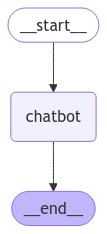

In [23]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [25]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

User: hello
dict_values([{'messages': AIMessage(content='Hello! 👋\n\nHow can I help you today? 😊\n', response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 3.5e-07, 'queue_time': 0.014316409, 'total_time': 0.027273077}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-291c186a-78c8-4811-b297-84536aed1e95-0', usage_metadata={'input_tokens': 10, 'output_tokens': 15, 'total_tokens': 25})}])
content='Hello! 👋\n\nHow can I help you today? 😊\n' response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 3.5e-07, 'queue_time': 0.014316409, 'total_time': 0.027273077}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-291c186a-78c8-4811-b297-84536aed1e95-0' usage_metadata={'inp

##Resources to know more:

[![LangGraph](https://img.shields.io/badge/LangGraph-Documentation-blue)](https://www.langchain.com/langgraph)


[![LangGraph GitHub](https://img.shields.io/badge/LangGraph-GitHub-green)](https://github.com/langchain-ai/langgraph)
